In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import train_test_split

## 9.6.1 Support Vector Classifier

Text(0, 0.5, 'x[1]')

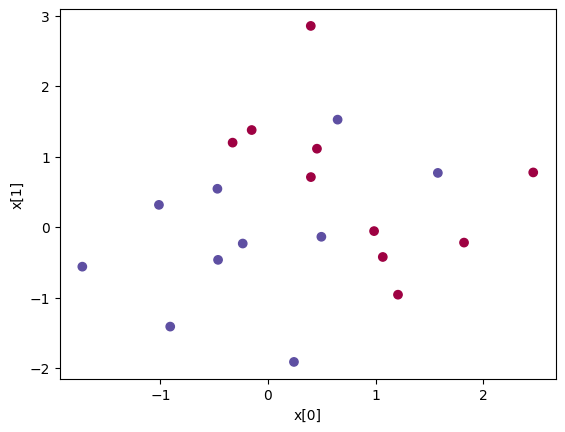

In [2]:
np.random.seed(42)
x = np.random.normal(size=40).reshape(20, 2)
y = np.concatenate((np.ones(10, dtype=np.int64)*-1, np.ones(10, dtype=np.int64)))
x[y == 1, :] += 1

plt.scatter(x[:, 0], x[:, 1], c=(3-y), cmap='Spectral')
plt.xlabel('x[0]')
plt.ylabel('x[1]')

In [3]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=10)
model.fit(x, y)

SVC(C=10, kernel='linear')

<Axes: >

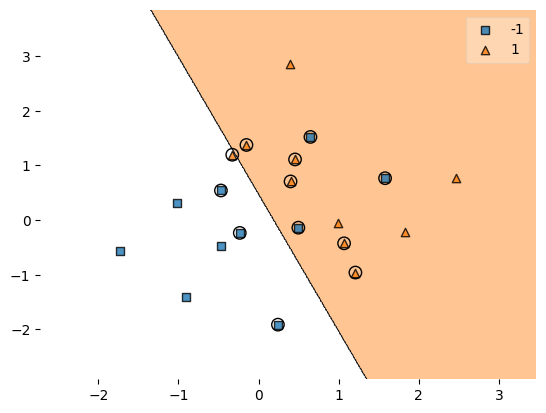

In [4]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x, y, clf=model, X_highlight=model.support_vectors_)

In [5]:
# number of support vectors
model.n_support_

array([6, 6], dtype=int32)

In [6]:
# indices of support vectors
model.support_

array([ 0,  1,  2,  3,  4,  6, 11, 12, 13, 14, 18, 19], dtype=int32)

In [7]:
# the classes labels
model.classes_

array([-1,  1])

<Axes: >

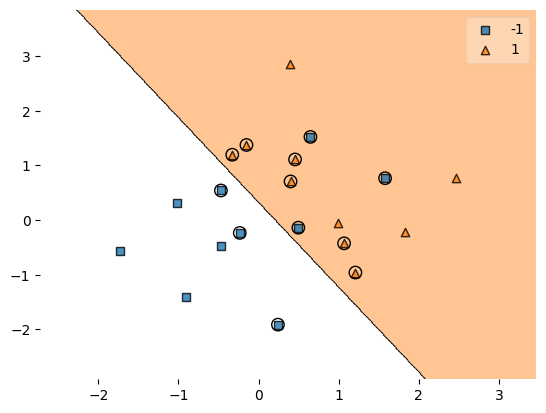

In [8]:
# another model with a smaller value of the cost parameter C
model2 = SVC(kernel='linear', C=0.1)
model2.fit(x, y)
plot_decision_regions(x, y, clf=model2, X_highlight=model.support_vectors_)

In [9]:
# number of support vectors
model2.n_support_

array([9, 9], dtype=int32)

A smaller value of the cost parameter is being used, we obtain a larger number of support vectors, because the margin is now wider. 

In [10]:
# ten-fold cross-validation 
from sklearn.model_selection import GridSearchCV

params = {'C': 10**np.linspace(-3, 3, 7)}
svc = SVC(kernel='linear')
tune = GridSearchCV(svc, params, cv=10)
tune.fit(x, y)

pd.DataFrame(tune.cv_results_).loc[:, ['param_C', 'mean_test_score', 'std_test_score']]

,param_C,mean_test_score,std_test_score
0,0.001,0.75,0.25
1,0.01,0.75,0.25
2,0.1,0.75,0.25
3,1.0,0.75,0.25
4,10.0,0.75,0.25
5,100.0,0.75,0.25
6,1000.0,0.75,0.25


In [11]:
# the best set of parameters obtained
tune.best_params_

{'C': 0.001}

In [12]:
# the best model obtained
print('number of support vectors: ', tune.best_estimator_.n_support_)
print('indices of support vectors: ', tune.best_estimator_.support_)

number of support vectors:  [10 10]
indices of support vectors:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


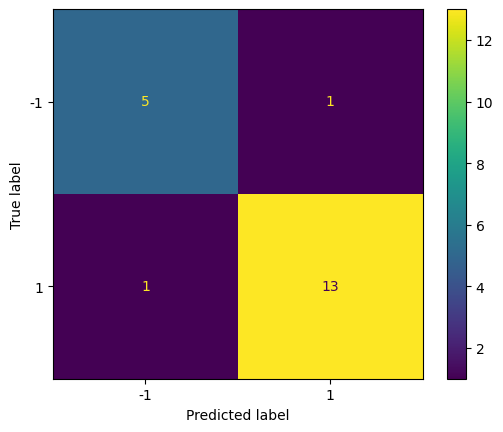

In [13]:
# predictions
x_test = np.random.normal(size=40).reshape(20, 2)
y_test = np.random.choice([-1, 1], size=20, replace=True)
x_test[y_test == 1, :] += 1

y_pred = tune.best_estimator_.predict(x_test)
cm = confusion_matrix(y_test, y_pred, labels=tune.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tune.best_estimator_.classes_)
disp.plot()

Thus, with this value of `C` (0.001), 18 of the test observations are correctly classified.

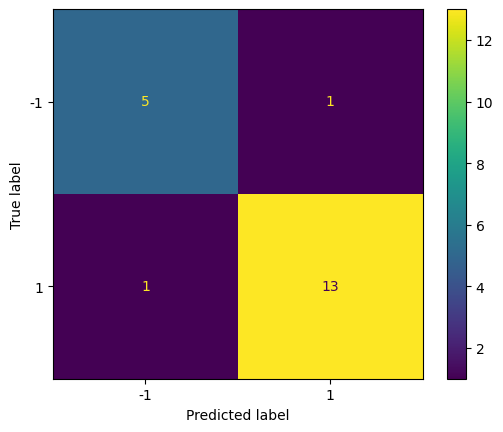

In [14]:
# c = 0.01
model4 = SVC(kernel='linear', C=0.01)
model4.fit(x, y)

y_pred2 = model4.predict(x_test)
cm2 = confusion_matrix(y_test, y_pred2, labels=model4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=model4.classes_)
disp.plot()

Text(0, 0.5, 'x[1]')

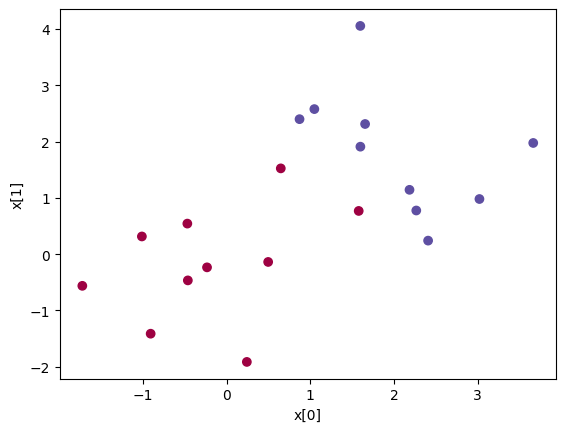

In [15]:
# Now consider a situation in which the two classes are linearly seperable
x[y == 1, :] += 1.2
plt.scatter(x[:, 0], x[:, 1], c=(y+5)/2, cmap='Spectral')
plt.xlabel('x[0]')
plt.ylabel('x[1]')

In [16]:
svc5 = SVC(kernel='linear', C=1e5)
svc5.fit(x, y)

print('number of support vectors: ', sum(svc5.n_support_))
print('indices of support vectors: ', svc5.support_)
print('number classes: ', len(svc5.classes_))

number of support vectors:  3
indices of support vectors:  [ 3 18 19]
number classes:  2


<Axes: >

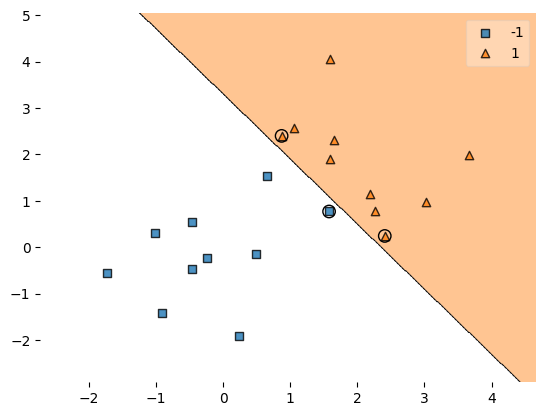

In [17]:
plot_decision_regions(x, y, clf=svc5, X_highlight=svc5.support_vectors_)

No training errors were made and only three support vectors were used. However, we can see from the figure that the margin is very narrow. It seems likely that this model will perform poorly on test data.

In [18]:
# now try a smaller value of cost
svc6 = SVC(kernel='linear', C=1)
svc6.fit(x, y)

print('number of support vectors: ', sum(svc6.n_support_))
print('indices of support vectors: ', svc6.support_)
print('number classes: ', len(svc6.classes_))

number of support vectors:  5
indices of support vectors:  [ 1  3 13 18 19]
number classes:  2


<Axes: >

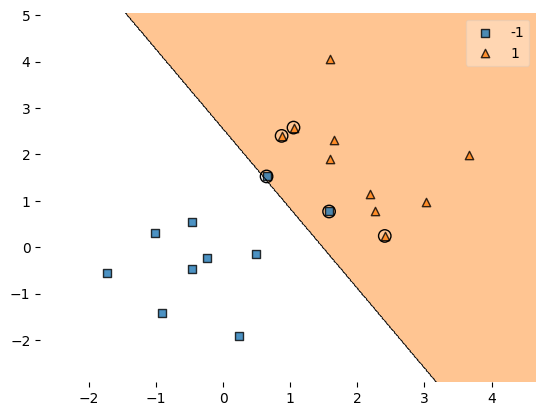

In [19]:
plot_decision_regions(x, y, clf=svc6, X_highlight=svc6.support_vectors_)

Using `cost = 1`, we misclassify two training observations, but we also obtain a much wider margin and make use of seven support vectors. It seems likely that this model will perform better on test data than the model with `cost = 1e5`.

## 9.6.2 Support Vector Machine

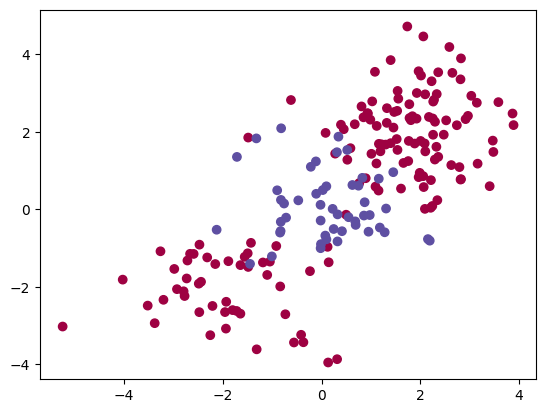

In [20]:
np.random.seed(42)
x = np.random.normal(size=400).reshape(200, 2)
x[1:100, ] += 2
x[100:150, ] -= 2
y = np.concatenate((np.repeat(1, 150), np.repeat(2, 50)))

plt.scatter(x[:, 0], x[:, 1], c=y, cmap='Spectral')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.5, random_state=42)

<Axes: >

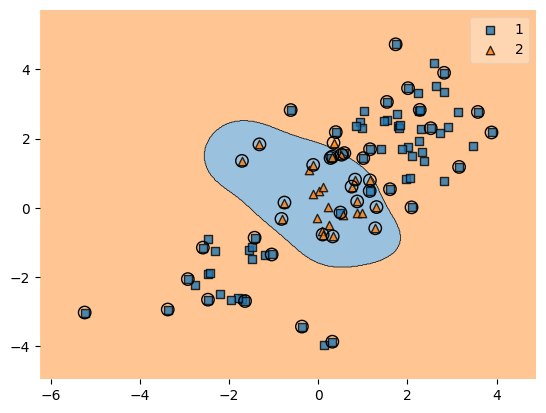

In [22]:
svm = SVC(kernel='rbf', gamma=1, C=1)
svm.fit(X_train, y_train)
plot_decision_regions(X_train, y_train, clf=svm, X_highlight=svm.support_vectors_)

The plot shows that the resulting SVM has a decidedly non-linear boundary.

In [23]:
print('number of support vectors: ', sum(svm.n_support_))
print('indices of support vectors: ', svm.support_)
print('number classes: ', len(svm.classes_))

number of support vectors:  45
indices of support vectors:  [ 9 11 15 19 25 27 28 29 31 32 36 37 38 39 46 47 49 52 57 64 67 71 77 83
 88 89 94 95 99 12 13 18 23 26 30 40 60 68 75 78 79 84 91 93 98]
number classes:  2


<Axes: >

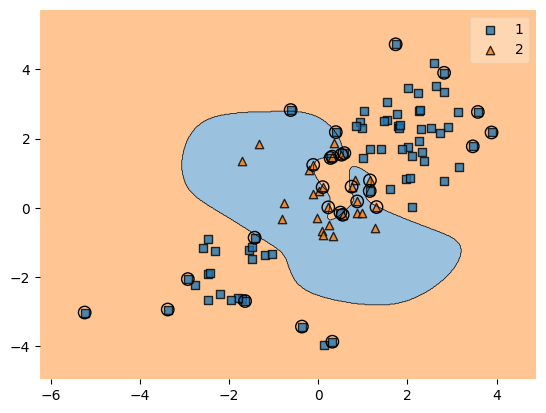

In [24]:
# we can increase the value of cost to reduce the number of training errors
svm2 = SVC(kernel='rbf', gamma=1, C=1e5)
svm2.fit(X_train, y_train)
plot_decision_regions(X_train, y_train, clf=svm2, X_highlight=svm2.support_vectors_)

However, this comes at the price of a more irregular decision boundary that seems to be at risk of overfitting the data.

We can perform cross-validation using `gridSearchCV` to select the best choice of γ and cost for an SVM with a radial kernel:

In [25]:
params = {'C': 10**np.linspace(-1, 3, 5),
         'gamma': [0.5, 1, 2, 3, 4]}

svm3 = SVC(kernel='rbf')
tune = GridSearchCV(svm3, params, cv=10)
tune.fit(X_train, y_train)

df = pd.DataFrame(tune.cv_results_).loc[:, ['param_C', 'param_gamma', 'mean_test_score', 'std_test_score']]
df.sort_values(by=['param_gamma', 'param_C'])

,param_C,param_gamma,mean_test_score,std_test_score
0,0.1,0.5,0.81,0.083066
5,1.0,0.5,0.94,0.080000
10,10.0,0.5,0.91,0.070000
15,100.0,0.5,0.90,0.063246
20,1000.0,0.5,0.87,0.100499
1,0.1,1,0.74,0.048990
6,1.0,1,0.94,0.066332
11,10.0,1,0.91,0.070000
16,100.0,1,0.88,0.097980
21,1000.0,1,0.86,0.128062


In [26]:
# best params
tune.best_params_

{'C': 1.0, 'gamma': 0.5}

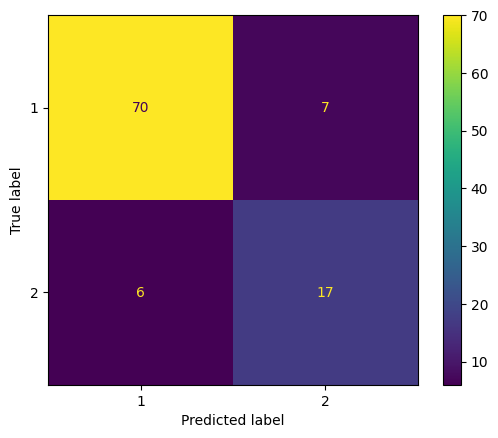

In [27]:
y_pred = tune.best_estimator_.predict(X_test)
cm3 = confusion_matrix(y_test, y_pred, labels=tune.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=tune.best_estimator_.classes_)
disp.plot()

In [28]:
from sklearn.metrics import accuracy_score

print(f'{(1 - accuracy_score(y_test, y_pred))} of test observations are misclassified by this SVM.')

0.13 of test observations are misclassified by this SVM.


## 9.6.3 ROC Curves

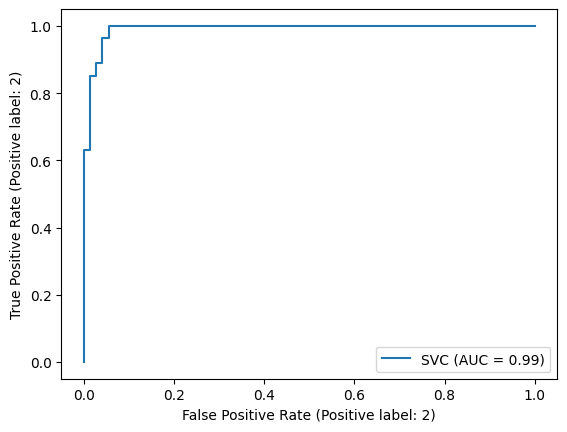

In [29]:
svm4 = SVC(kernel='rbf', gamma=2, C=1, probability=True)
svm4.fit(X_train, y_train)
disp = RocCurveDisplay.from_estimator(svm4, X_train, y_train)

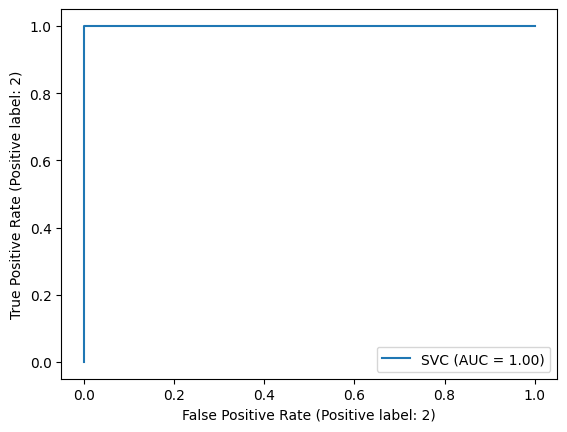

In [30]:
# increase the value of gamma
svm5 = SVC(kernel='rbf', gamma=50, C=1, probability=True)
svm5.fit(X_train, y_train)
disp = RocCurveDisplay.from_estimator(svm5, X_train, y_train)

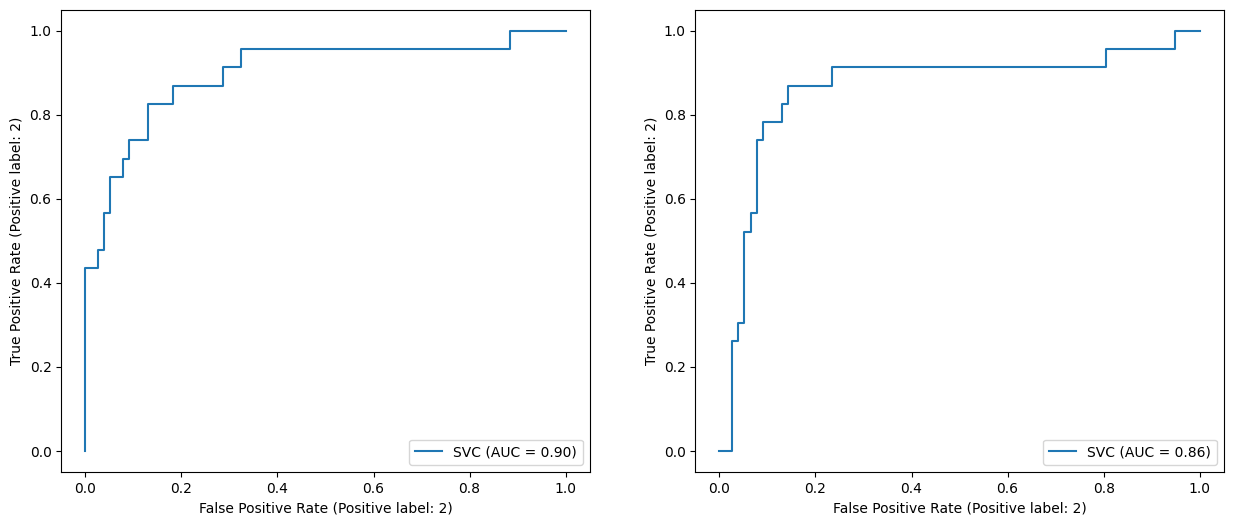

In [31]:
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False)
fig.set_figheight(6)
fig.set_figwidth(15)

disp = RocCurveDisplay.from_estimator(svm4, X_test, y_test, ax=ax[0])
disp2 = RocCurveDisplay.from_estimator(svm5, X_test, y_test, ax=ax[1])

When we compute the ROC curves on the test data, the model with `γ = 2` appears to provide the most accurate results.

## 9.6.4 SVM with Multiple Classes

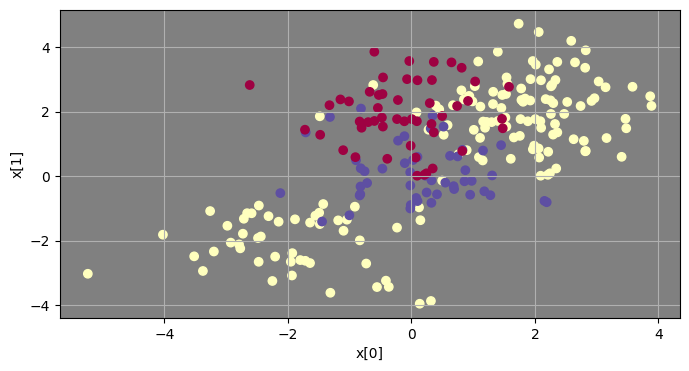

In [32]:
np.random.seed(42)

x_ = np.random.normal(size=100).reshape(50, 2)
x = np.vstack((x, x_))
y = np.concatenate((y, np.repeat(0, 50)))
x[y == 0, 1] += 2

fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x[:, 0], x[:, 1], c=(y+1), cmap='Spectral')
ax.set_xlabel('x[0]')
ax.set_ylabel('x[1]')
ax.set_facecolor('grey')
ax.grid(True)

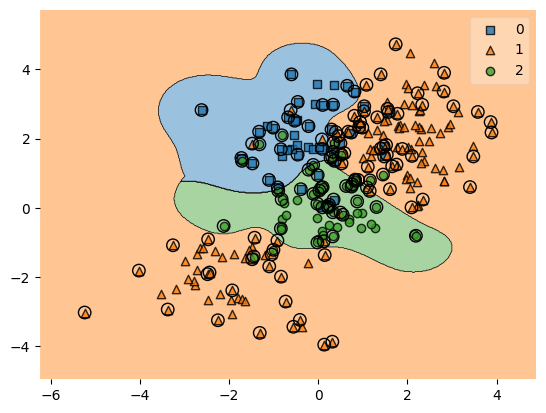

In [33]:
svm_multi_class = SVC(kernel='rbf', gamma=1, C=10)
svm_multi_class.fit(x, y)
plot_decision_regions(x, y, clf=svm_multi_class, X_highlight=svm_multi_class.support_vectors_);

## 9.6.5 Application to Gene Expression Data

In [34]:
Khan_Xtrain = pd.read_csv('../data/Khan_xtrain.csv', index_col=0)
Khan_Xtest = pd.read_csv('../data/Khan_xtest.csv', index_col=0)
Khan_ytrain = pd.read_csv('../data/Khan_ytrain.csv', index_col=0)
Khan_ytest = pd.read_csv('../data/Khan_ytest.csv', index_col=0)

In [35]:
Khan_Xtrain.shape, Khan_Xtest.shape, len(Khan_ytrain), len(Khan_ytest.shape)

((63, 2308), (20, 2308), 63, 2)

This data set consists of expression measurements for 2,308 genes. The training and test sets consist of 63 and 20 observations respectively.

In [36]:
Khan_ytrain.value_counts(sort=False)

x
1     8
2    23
3    12
4    20
dtype: int64

In [37]:
Khan_ytest.value_counts(sort=False)

x
1    3
2    6
3    6
4    5
dtype: int64

In this data set, there are a very large number of features relative to the number of observations. This suggests that we should use a linear kernel, because the additional flexibility that will result from using a polynomial or radial kernel is unnecessary.

In [38]:
out = SVC(kernel='linear', C=10)
out.fit(Khan_Xtrain, Khan_ytrain.iloc[:, 0])
print('number of support vectors: ', sum(out.n_support_))
print('indices of support vectors: ', out.support_)
print('classes: ', out.classes_)

number of support vectors:  54
indices of support vectors:  [55 56 57 58 59 60 62  0  1  2  3  4  5  6  8  9 10 11 12 13 14 16 19 20
 22 43 44 45 46 47 48 49 52 54 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42]
classes:  [1 2 3 4]


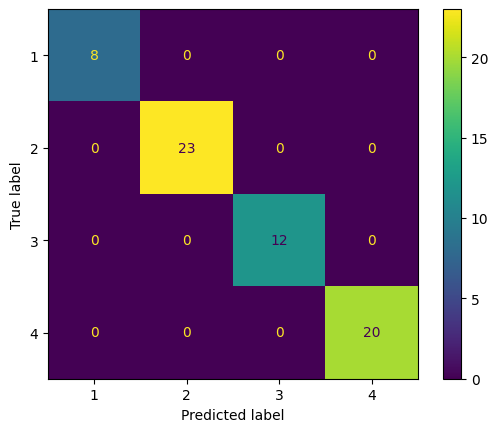

In [39]:
# Performance on the training set
y_pred = out.predict(Khan_Xtrain)

cm = confusion_matrix(Khan_ytrain, y_pred, labels=out.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=out.classes_)
disp.plot()

We see that there are no training errors. In fact, this is not surprising, because the large number of variables relative to the number of observations implies that it is easy to find hyperplanes that fully separate the classes. We are most interested not in the support vector classifier’s performance on the training observations, but rather its performance on the test observations.

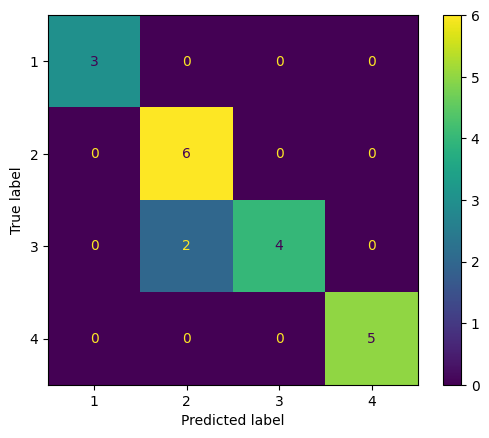

In [40]:
# Performance on the test set
y_pred2 = out.predict(Khan_Xtest)

cm = confusion_matrix(Khan_ytest, y_pred2, labels=out.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=out.classes_)
disp.plot()

We see that using `C=10` yields two test set errors on this data.